In [63]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
from nltk.stem import WordNetLemmatizer

In [65]:
from sklearn.decomposition import TruncatedSVD

In [66]:
wordnet_lemmatizer = WordNetLemmatizer()

In [67]:
titles = [line.rstrip() for line in open('all_book_titles.txt')]

In [68]:
stopwords = set(w.rstrip() for w in open('stopwords1.txt'))

In [69]:
stopwords = stopwords.union({'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth'})

In [70]:
def my_token(s):
    s= s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(tokens)>2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    
    return tokens

In [71]:
word_map_index = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0

In [72]:
for t in titles:
    t = t.encode('ascii','ignore').decode('utf-8')
    tokens = my_token(t)
    all_tokens.append(tokens)
    all_titles.append(t)
    for token in tokens:
        if token not in word_map_index:
            word_map_index[token] = current_index
            current_index += 1
            index_word_map.append(token)


In [73]:
def token_to_vector(token):
    x = np.zeros(len(word_map_index))
    for t in token:
        i = word_map_index[t]
        x[i] = 1
    return x

In [74]:
data = np.zeros((len(word_map_index),len(all_tokens)))
i = 0
for t in all_tokens:
    data[:,i] = token_to_vector(t)
    i += 1

In [78]:
svd = TruncatedSVD()
Z = svd.fit_transform(data)

In [80]:
Z.shape

(2104, 2)

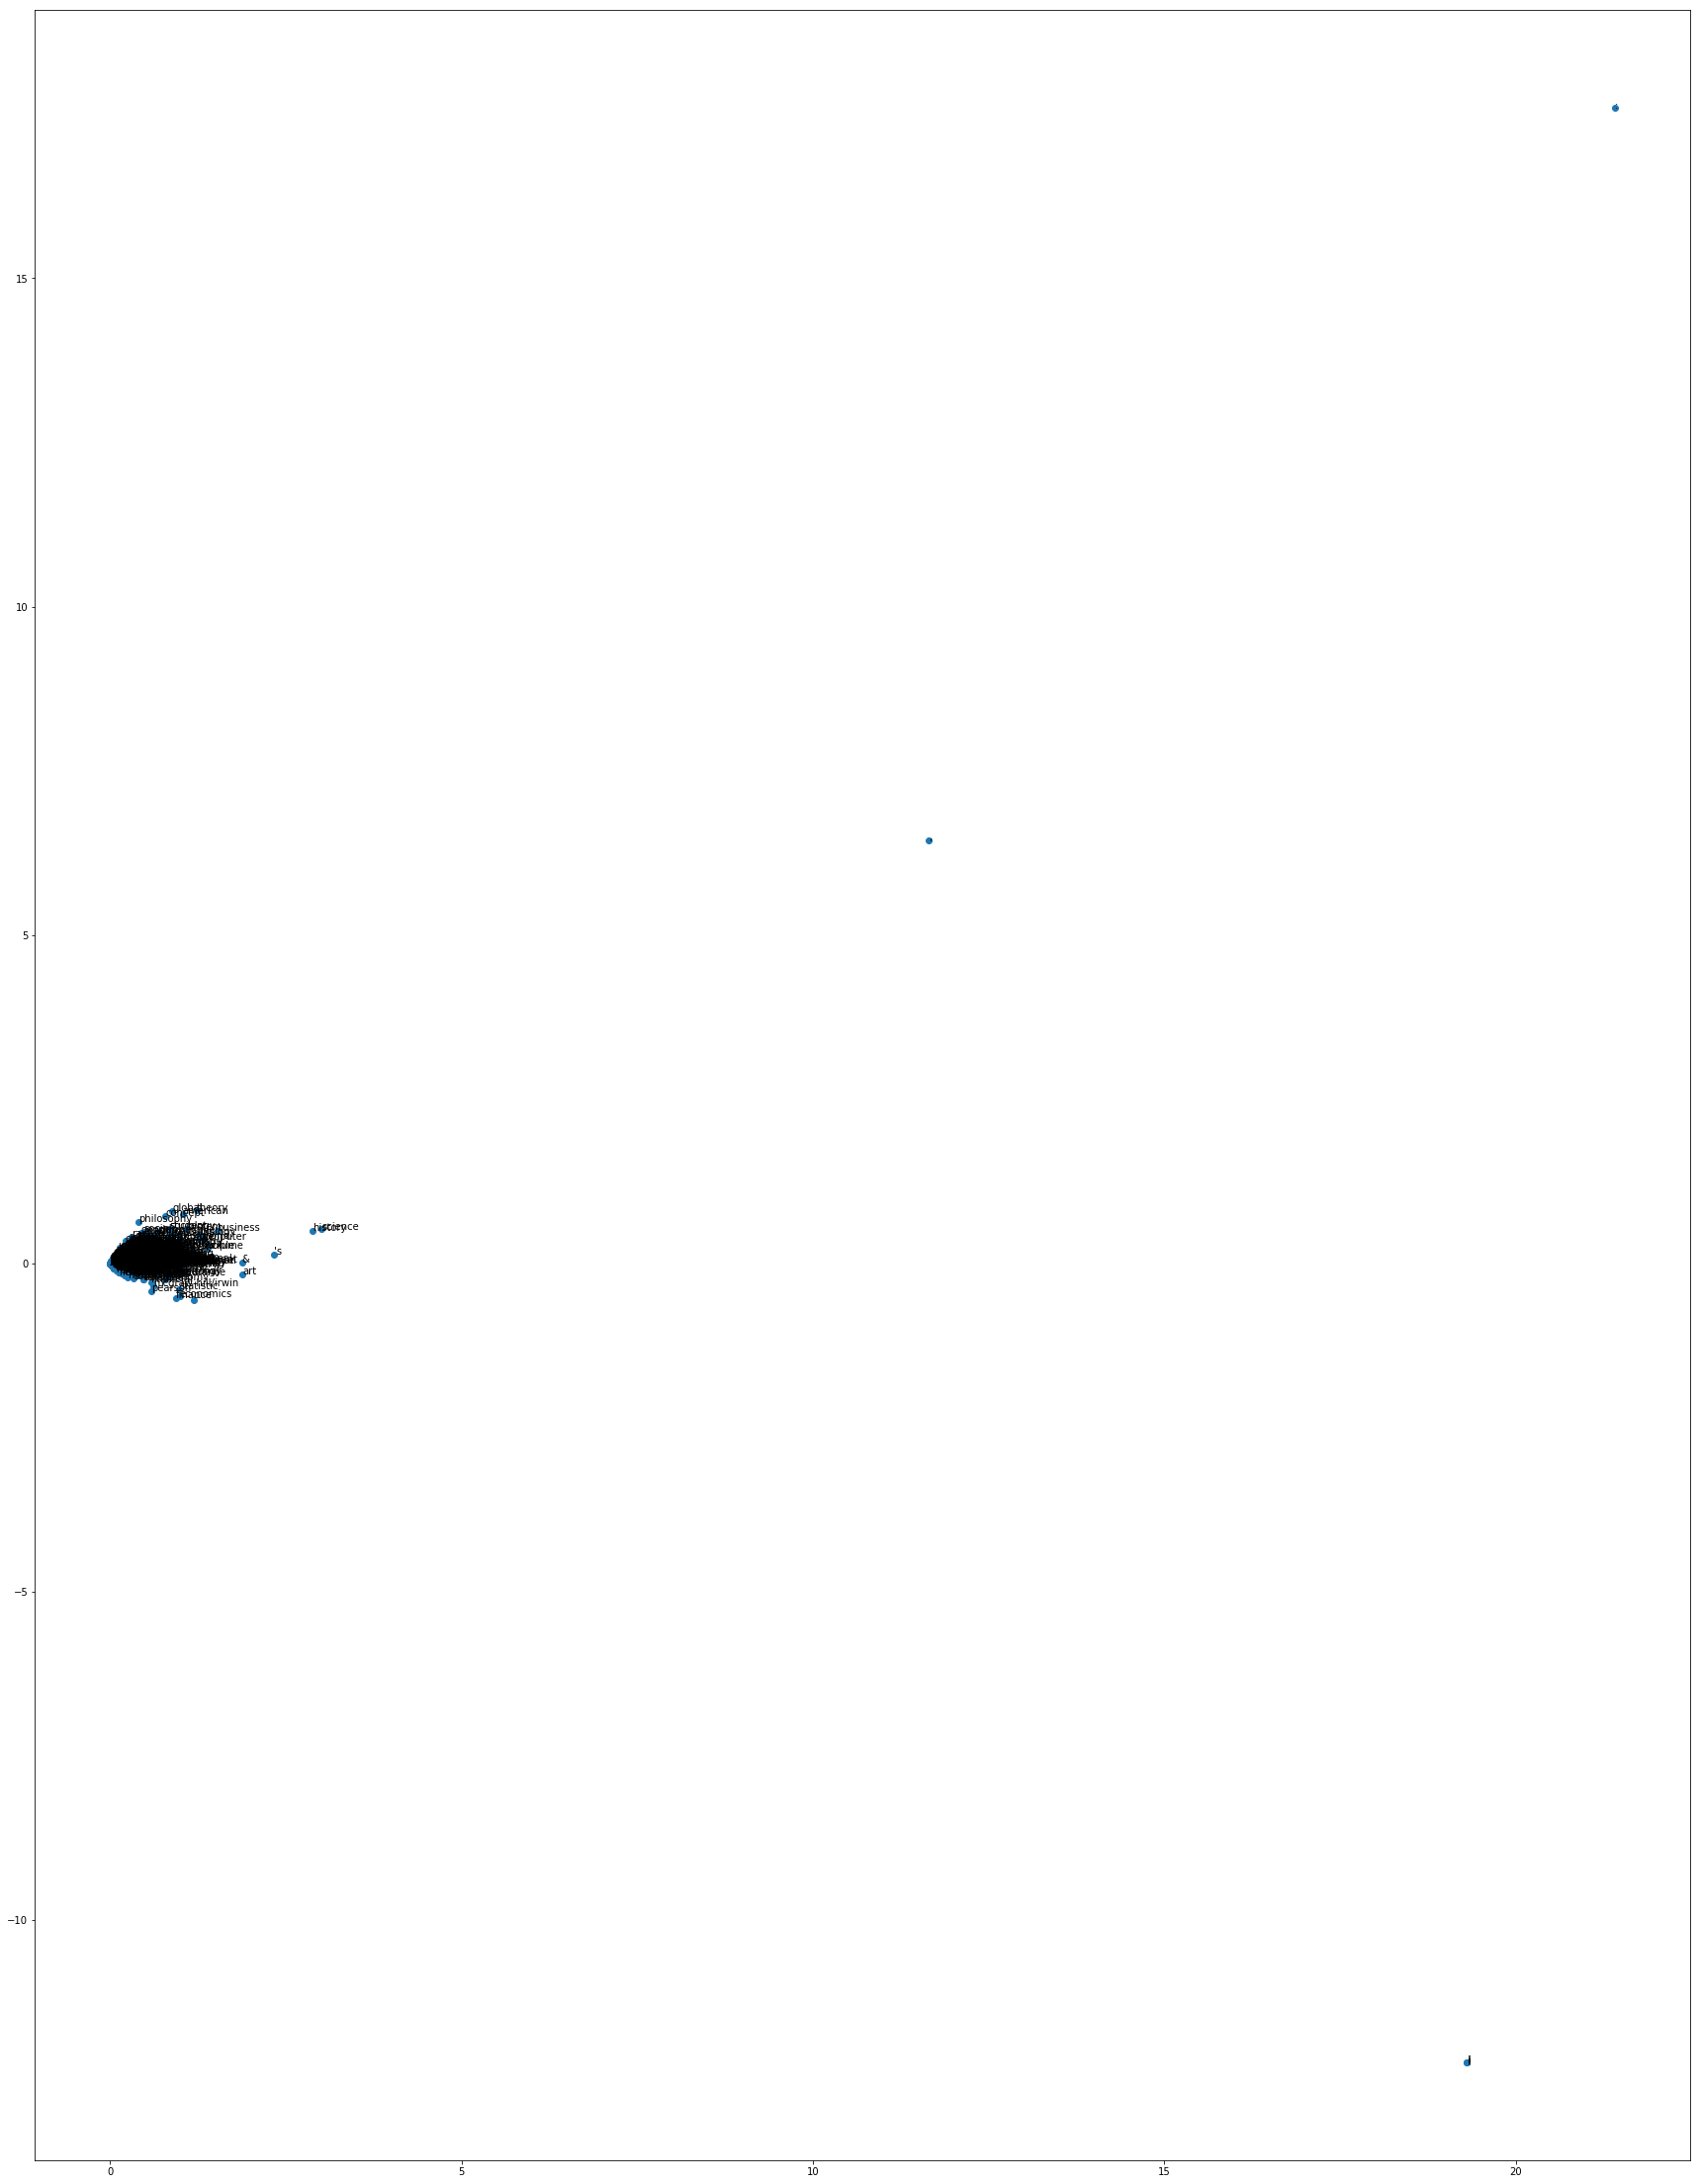

In [85]:
plt.figure(figsize=(30,40))
plt.scatter(Z[:,0],Z[:,1])
for i in range(len(word_map_index)):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))